### We will use linear Regression and Lasso Regression

---



# type of regression models :

Linear Regression

Ridge Regression

Neural Network Regression

Lasso Regression 

Decision Tree Regression 

Random Forest

KNN Model

Support Vector Machines (SVM)

Gausian Regression

Polynomial Regression 
-------------------------------
type :
Binary Classification.

Multi-Class Classification.

Multi-Label Classification.

Imbalanced Classification.

1. Logistic regression

2. Naive Bayes

3. K-Nearest Neighbors

4.Support Vector Machine

5. Decision Tree

Importing Dependencies

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

LOading

In [ ]:
car_data = pd.read_csv('car data.csv')

In [ ]:
car_data.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [ ]:
car_data.shape

(301, 9)

find missing values

In [ ]:
car_data.isnull().sum() #no missing values thank god

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#checking the distribution of cartegorical data
print(car_data.Fuel_Type.value_counts()) #number of balues for petrol & diesel & CNG
print('________________')
print(car_data.Seller_Type.value_counts())
print('________________')
print(car_data.Transmission.value_counts()) #manual car or automatic

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
________________
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
________________
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Pre-PROCESSING 


```
# ENCODING THE CATEGORICAL DATAS
```



In [ ]:
#encoding "fual_type" column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#seller type
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
#transmission
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X=car_data.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y=car_data['Selling_Price']

In [ ]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
import joblib

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=2)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [ ]:
training_data_prediction=model.predict(X_train)

comparing predicted to original Y_train

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error",error_score)

R squared Error 0.8838169193709796


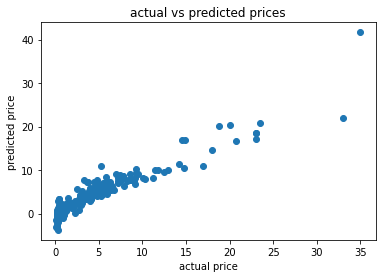

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title('actual vs predicted prices')
plt.show()

# *most* of the values are close to each other

In [ ]:
test_data_prediction=model.predict(X_test)

In [ ]:
error_test=metrics.r2_score(Y_test,test_data_prediction)
error_test

0.8401532365377697

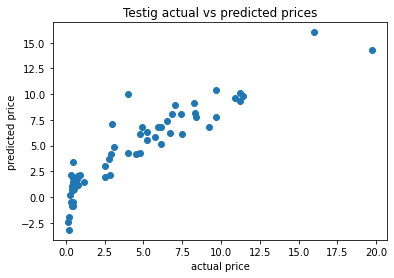

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title('Testig actual vs predicted prices')
plt.show()

### TRYING WITH LASSO REGRESSION

In [ ]:
model2=Lasso()

In [ ]:
model2.fit(X_train,Y_train)

Lasso()

In [ ]:
training_data_prediction2=model2.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction2)
print("R squared Error",error_score)

R squared Error 0.843587395258283


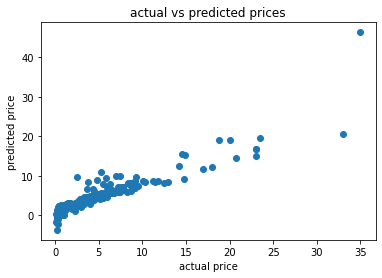

In [ ]:
plt.scatter(Y_train,training_data_prediction2)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title('actual vs predicted prices')
plt.show()

better

In [ ]:
test_data_prediction2=model.predict(X_test)

In [ ]:
error_test=metrics.r2_score(Y_test,test_data_prediction2)
error_test

0.8401532365377697

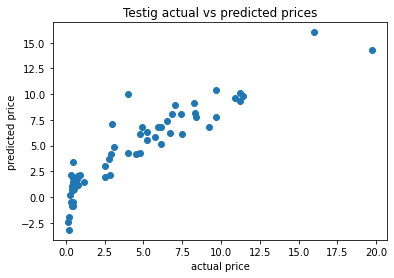

In [ ]:
plt.scatter(Y_test,test_data_prediction2)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title('Testig actual vs predicted prices')
plt.show()

In [ ]:
filename="finalized.sav"
joblib.dump(model,filename)

['finalized.sav']

In [ ]:
import joblib
model= joblib.load('finalized.sav')
import numpy as np
model.predict(np.array([2014,5.59,72000,0,0,0,0]).reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3.57141803])